#                                  Credit Card Fraud Detection 

# Work flow :-

1. Importing the dependencies

2. Credit Card Data
     2.1 Loading Credit Card data to pandas dataframe
     2.2 Visualizing first 5 and Last 5 rows of dataset
     
3. Data Analysis
     3.1 Checking Non-null count and type of dataframme
     3.2 Checking the Number of missing values in column
     3.3 Distribution of Normal and fraudulent transaction
     3.4 Comparing the values for both transaction
     3.5 Comparing the values for both transaction
     
4. Data preprosessing
     4.1 Undersampling of Legit data
     4.2 Creating New balanced dataset
     4.3 Analysing New balanced dataset
     4.4 Splitting the data into feature and target data
     4.5 Feature scaling
     
5. Splitting the data 
     5.1 Split the data into training set and test set
     
6.Model
     6.1 Logistic Regression
          6.1.1 Fit the data
          6.1.2 Accuracy of logistic regression
          6.1.3 Classification report
     6.2 Principle Componenet analysis
          6.2.1 Fit the Model
          6.2.2 Accuracy of PCA
          6.3.3 Classification report
     6.3 Decision trees
          6.3.1 Fit the Model
          6.3.2 Select parameters
          6.3.3 Checking Accuracy score
          6.3.4 Classfication report 
      
7. Conclusion

Need of the Project :

Accorgding to data from RTI and RBI,
    1) A typical organization loses 5% of their yearly revenues to fraud.
    2) 2480 cases of fruad in public sector banks involiving Rs 31,898.63 crore.
    3) In 2017-18, total of 911 credit card frauds amounting to Rs 65.26 crore.
so ,for keeping the customers money safe we are creating ML model to predict the fraud in future transactions. 

# 1. Importing the Dependencies

In [53]:
import numpy as np   # Importing numpy as np for matrix operations
import pandas as pd  # Importing pandas library 
import matplotlib.pyplot as plt   # Using matplotlib library for visualizing data
import sklearn        # Importing sklearn library

from sklearn.model_selection import train_test_split                #For splitting the model in training and test set
from sklearn.metrics import classification_report,accuracy_score    # To check Accuracy of model for comparing different models

## 2. Credit Card Data

#### 2.1 Loading the dataset to the pandas Dataframe

In [55]:
cc_data= pd.read_csv('creditcard.csv')    #Loading the dataset using pandas and naming it as cc_data

#### 2.2 Visualizing First 5 and Last 5 rows of data set to visualize the data

In [56]:
cc_data.head() #First 5 rows of dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [57]:
cc_data.tail() #Last 5 rows of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## 3. Data Analysis

In Data analysis we will analyze data to discover pattern, trends, missing values in data with the help
of statistical summary and graphical representation. It will help us gathering better insights of data to remove irregularities and unnecesarry values from data.

#### 3.1 Checking Non-null count and type of data in dataframe

In [58]:
cc_data.info() # To print all infromation about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### 3.2 Checking the number of missing values in each column

In [59]:
cc_data.isnull().sum() #Gives us the sum of number of missing values columnwise in datset

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### 3.3 Distribution of Legit Transaction and Fraudulent Transaction

To visualize Class distribution, plotting graph for number of cases of Legit and Fraud transaction

Text(0, 0.5, 'Frequency')

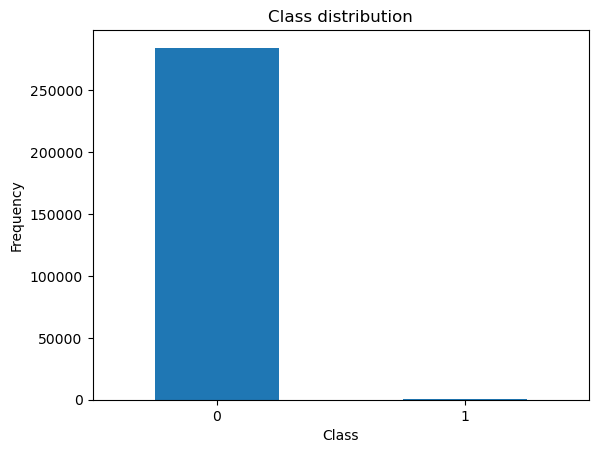

In [60]:
Class_distribution = pd.value_counts(cc_data['Class'],sort = True)
Class_distribution.plot(kind='bar', rot=0)
plt.title("Class distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

Graph is showing huge different in distribution of categories in Class. 
0 Class is in huge amount and Class 1 is neglegible as compared to Class 0.

 Saving Normal Transaction with class 0 as Legit and fraud transaction with class 1 as fraud


In [8]:
Legit = cc_data[cc_data.Class == 0]      # Naming Class 0 transactions as Legit
fraud = cc_data[cc_data.Class == 1]      # Naming Class 1 transactions as fraud
print(Legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


#### 3.4 Statistical measures for the data

This data is completely unbalanced as we are having 284315 examples of one class i.e class 0 ( normal or legit transaction) while 492 examples of other class which is class 1 ( Fraud transaction). If we feed this data for training our algorithm then it will always give us back transaction as normal transaction only. For making it fair we need to balance the data.

To know how different are the amount of money used for the both classes, we will use describe()

In [9]:
Legit.Amount.describe() # To describe legit transactions

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [61]:
fraud.Amount.describe() # To descrive fraud transaction

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

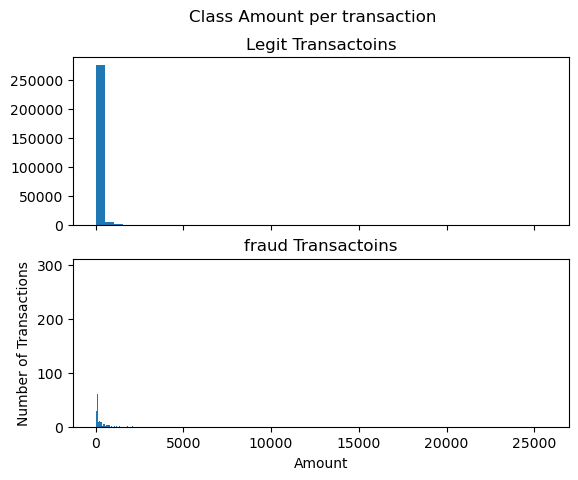

In [11]:
# For comparing Amount distiution of Legit and Fraud transaction plotting graph of Amount vs Number of transaction graph
fig,(axis1,axis2)=plt.subplots(2,1,sharex=True)
fig.suptitle('Class Amount per transaction')
axis1.hist(Legit.Amount, bins=50)
axis2.hist(fraud.Amount, bins=50)
axis1.set_title('Legit Transactoins')
axis2.set_title('fraud Transactoins')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.show();

#### 3.5 Comparing the values for both transaction

We are using groupby function to group the data according to its Categories. 

Here we are using the 0 and 1 in Class column as a Categories. 

Using mean() will show us the mean value of all data 0(Legit) and 1(Fraud) class. 

In [62]:
cc_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## 4. Data Pre-processing

#### 4.1 Undersampling Normal data 

Building the sample dataset conatining similar distribution of legit transaction and fraud transaction

Undersampling - In undersampling we will Reduce the examples from majority class through scientific algorithm
               1) Prototype generation - Use New examples
               2) Prototype Selection - Use old examples
               
Oversampling - Practically generate more synthetic examples of minority class
             - Add more examples

We are doing Undersampling here.
          In this perticular example we will be selecting randomly selecting 492 transaction from 284315 transactions and will 
          join it with fruadulent transactoin ones we do that we will have 492 normal transaction and 492 normal transaction.
          Then it will considered as balanced dataset.

In [63]:
legit_sample = Legit.sample(n=492) # Taking 492 samples from 284315 samples to make the data balance

#### 4.2 Creating new balanced dataset

 Concatinating two dataframes along the rows to create New balanced dataset

In [64]:
New_dataset = pd.concat([legit_sample,fraud], axis=0)    # Joining both dataset to creat new balanced dataset

#### 4.3 Analyzing New balance dataset

Visualizing First 5 and Last 5 rows of data set to visualize the data

In [65]:
New_dataset.head() #First five rows of new balanced dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
177096,123037.0,2.044985,-0.286515,-0.637887,0.234176,-0.059260,0.239452,-0.553621,-0.025869,1.230720,...,0.160204,0.784573,0.051533,0.157732,0.077915,-0.211734,0.048655,-0.033240,4.99,0
200280,133370.0,-0.856696,1.749517,2.541024,4.392993,-0.576541,1.124435,-0.385593,0.772866,-1.791860,...,0.063694,0.243746,-0.135725,-0.026069,-0.011349,0.402420,0.261417,0.109829,22.23,0
94813,65042.0,1.317000,-0.988678,0.438012,-1.029398,-0.871868,0.697161,-1.302355,0.378316,-0.342297,...,0.382180,0.924919,-0.234512,-1.147998,0.415688,0.037979,0.033187,0.001674,39.00,0
157930,110646.0,-0.509788,0.852221,2.405532,-0.118734,0.182853,-0.246874,0.585291,-0.287392,1.418026,...,-0.292414,-0.360497,-0.288660,-0.100619,0.273428,-0.727076,-0.075002,-0.144465,9.39,0
199927,133203.0,0.098367,1.044310,-0.310882,-0.634714,0.970286,-0.577149,0.912445,-0.009415,-0.415971,...,-0.275086,-0.643795,0.085926,0.679188,-0.446915,0.084495,0.223828,0.076783,0.89,0


In [66]:
New_dataset.tail() #Last five rows of new balanced dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [67]:
New_dataset['Class'].value_counts() #Checking value counts of the both categories in the class column to check balanced dataset

0    492
1    492
Name: Class, dtype: int64

In [68]:
#To check the mean value's for each categories of the class column of New dataset
New_dataset.groupby('Class').mean() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97069.676829,0.096025,-0.064371,-0.063403,-0.013817,-0.045538,0.070377,0.038867,-0.008812,0.058748,...,0.048176,-0.010872,0.045095,0.055302,0.025742,0.022764,0.024347,-0.024150,-0.027830,102.616423
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### 4.4 Splitting the data into feature and target data

In [69]:
X = New_dataset.drop(columns='Class', axis=1) #Saving all columns except Class column as Independent variable X from New_dataset
Y = New_dataset['Class']                      #Saving Class column as dependent variable Y from New_dataset

In [70]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
177096  123037.0  2.044985 -0.286515 -0.637887  0.234176 -0.059260  0.239452   
200280  133370.0 -0.856696  1.749517  2.541024  4.392993 -0.576541  1.124435   
94813    65042.0  1.317000 -0.988678  0.438012 -1.029398 -0.871868  0.697161   
157930  110646.0 -0.509788  0.852221  2.405532 -0.118734  0.182853 -0.246874   
199927  133203.0  0.098367  1.044310 -0.310882 -0.634714  0.970286 -0.577149   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [71]:
print(Y)

177096    0
200280    0
94813     0
157930    0
199927    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


#### 4.5 Feature scaling

Feature scaling is the method used to standerdize range of independent variable in fixed range.
Feature scaling allows Ml model to give fair weightage to all feature ,
Not giving higher weight to higher values and lower weight to lower values irrespective of the unit.

In [72]:
from sklearn.preprocessing import StandardScaler # Importing StandardScaler to standerdize the data
scaler = StandardScaler()
scaler.fit(New_dataset)                           # Fitting the New_dataset in the StandardScaler
scaled_data = scaler.transform(New_dataset)

## 5. Splitting the data

#### 5.1 Splitting the data into training set and test set 

Sliptting the data into training data and test data such that 80% of the data will be train data and 20% of the data will be test data

In [73]:
# Stratify =Y  To split the data in startified fashion

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 , stratify=Y, random_state=2)

In [74]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


## 6. Models

In [75]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,f1_score

## 6.1 LogisticRegression()

Logistic Regression is the binary algorithm which is used to predict binary outcome based on a set of independent variable.

Logistic regression is used for classification problems when the output or dependent variable is categorical.

Here , Data is categorized into two categories as Legit and Fraud transaction so we will use Logisctic Regression to predict the data

#### 6.1.1 Fit the model

In [76]:
from sklearn.linear_model import LogisticRegression   # Importing Logistic Regression model from sklearn

In [77]:
LR_model = LogisticRegression()

Training the Logistic regression model with the training data

In [78]:
LR_model.fit(X_train, Y_train)       # Fitting X and Y training set in Logistic Regression model

LogisticRegression()

#### 6.1.2 Accuracy and Confusion_matrix for Logistic Regression

Confusion matrix gives us the summery of prediction results for classification problem.
It gives the number of value counts for correct and incorrect predictions.

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score    # Importing confusion matiz and accuracy score from sklearn
Y_pred = LR_model.predict(X_test)                               # predicting the results from X_test set as independent variable
cm = confusion_matrix(Y_test, Y_pred)
print(cm)                                                       # printing(confusion matix)
accuracy_score(Y_test, Y_pred)                                  # printing(accuaracy score) 

[[98  1]
 [15 83]]


0.9187817258883249

#### 6.1.3 Classification report

1) We will use the Classification report to evaluate and compare the performance of the all the model. 

2) In which Precision will show the ratio of true positive to the sum of truw and false positive.

3) Recall will show the ratio of true positives to the sum of true positives and false negatives.

4) The F1 will show the weighted harmonic mean of precision and recall. 
The closer the value of the F1 score is to 1.0, the better is the expected performance of the model is.

5) Support will show the number of actual occurrences of the class in the dataset.
It doesn’t vary between models, it just diagnoses the performance evaluation process.

Using Classification report in Logisctic Regression to evaluate its performance.

In [80]:
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92       113
           1       0.85      0.99      0.91        84

    accuracy                           0.92       197
   macro avg       0.92      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197



## 6.2 Principle Component Analysis

PCA (Principle Component Analysis) is one of the dimentionality reduction technique used to deal with high dimensionality.

It extracts some important feature to predit the dependent variable and discards less important feature.

The main aim of PCA is to reduce the number of features or variables in a dataset and also retainas much 
information as possible from the actual dataset.

#### 6.2.1 Fit the model

Taking 2 features as Principle Component from 30 to reduce dimension

In [81]:
from sklearn.decomposition import PCA   # Importing PCA from sklearn
pca = PCA(n_components = 2)
print(pca)

PCA(n_components=2)


In [82]:
pca.fit(scaled_data) # Fitting the scaled_data (After feature scaling) in tht pca model

PCA(n_components=2)

In [83]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)                  # Checking shape of data before dimentionality reduction

(984, 31)


In [84]:
print(x_pca.shape)                         # Checking shape of the data after dimensionality reduction using PCA

(984, 2)


We can see the shape of the data reduced from 31 features to the 2 principle features after dimentionality reduction using PCA

Sliptting the data into training data and test data such that 80% of the data will be train data and 20% of the data will be test data

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(x_pca, Y, test_size=0.2 , stratify=Y, random_state=2)

Applying Logistic Regression model after Dimentinality Reduction through PCA

In [86]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

#### 6.2.2 Accuracy of PCA

Checking Accuracy score and confusion matrix for PCA

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score        # importing confusion matrix and accuracy score from sklearn
y_pred = classifier.predict(X_test)                                 # Predicting results using LogisticRegression 
cm = confusion_matrix(Y_test, y_pred)                               # Printing confusion matrix
print(cm)
accuracy_score(Y_test, y_pred)

[[98  1]
 [11 87]]


0.9390862944162437

#### 6.2.3 Classification report

Using Classification report in Logisctic Regression with PCA to evaluate its performance.

In [88]:
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92       113
           1       0.85      0.99      0.91        84

    accuracy                           0.92       197
   macro avg       0.92      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197



## 6.3 Using Decision tree

1) Decision Tree Analysis is a general, predictive modelling tool.

2) In general, decision trees are constructed via an algorithmic approach that identifies ways to split a data set based on
different conditions.

3) The goal of decision tree is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

4) The decision rules are generally in form of if-then-else statements.

#### 6.3.1 Fit the Model

In [89]:
from sklearn.tree import DecisionTreeClassifier           #Importing Decision tree model from sklearn

In [90]:
treemodel=DecisionTreeClassifier()                        # Saving DecisionTreeClassifier as treemodel

In [91]:
treemodel.fit(X_train,Y_train)                            # fitting X and Y training dataset in Decision tree model

DecisionTreeClassifier()

#### 6.3.2 Pre-prunning

1) Pre-prunnung is method that can help us avoid overfitting. 

2) It helps in improving the performance of the tree by cutting the nodes or sub-nodes which are not significant.

3) It removes the branches which have very low importance.

4) We will select the parameters for removing branches of low importance. Our parameters for selecting branches wiil be
    criterion, splitter, max_depth and max_features.

In [92]:
#Preprunning decision tree
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth' : [1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
     }

In [93]:
# GridSearchCV is used for finding the optimal parameter values from a given set of parameters in a grid.
from sklearn.model_selection import GridSearchCV

In [94]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [95]:
cv.fit(X_train,Y_train)         #Fitting X and Y training dataset in model

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_mes

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [98]:
cv.best_params_               # To know the best parameters for particular decision tree model

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'splitter': 'best'}

#### 6.3.3. Checking Accuracy score

In [99]:
Y_pred=cv.predict(X_test)                 # Predicting the results of decision tree model

In [48]:
from sklearn.metrics import accuracy_score,classification_report

In [100]:
score=accuracy_score(Y_pred,Y_test)       # Checking the accuracy of decision tree model
print(score)

0.949238578680203


#### 6.3.4 Classification report

Using Classification report in Decision Tree to evaluate its performance.

In [101]:
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       103
           1       0.93      0.97      0.95        94

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



# 7. Conclusion

             Model                         Accuracy
    
1)   Logistic Regression                     0.918            

2)   Principle Component Analysis            0.939
     with LogisticRegression
    
3)   Decision Tree                           0.949

Among all three models Logistic Regression is giving lowest accuracy while Decision tree model is giving highest accuracy of 94.9 %.

Thanks and Regards.
(WIDS team and Mentor Meet Joshi) from Pranit Chute. 

